# TP1 Data acquisition - EDA

In [1]:
import numpy as np
import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import PercentFormatter

import pypyodbc


In [2]:
SERVER_NAME='SPARK-BA-00003\SQLEXPRESS'
DATABASE_NAME='olist'
ready = True
try:
    conn=pypyodbc.connect("""
    Driver={{SQL Server Native Client 11.0}};
    Server={0};
    Database={1};
    Trusted_Connection=yes;""".format(SERVER_NAME, DATABASE_NAME))
except pypyodbc.ex as ex:
            ready = (except_msg)

if ready==True:
    print('Conexion exitosa a SQL Server')
else:
    print(ready)
        

Conexion exitosa a SQL Server


In [3]:
#Carga datasets desde la base de datos
#Se implementa error handling
try:
    #Carga Ordenes
    dfOrders=pd.read_sql("SELECT * from olist_orders", conn)
    #Carga Lineas de pedido de cada orden
    dfOrderItems = pd.read_sql("SELECT * from olist_order_items", conn)
    #Carga Productos
    dfProductos = pd.read_sql("SELECT * from olist_products", conn)
    #Carga Vendedores
    dfOrderSellers = pd.read_sql("SELECT * from olist_sellers", conn)
    #Carga Pagos de ordenes
    dfOrderPayments = pd.read_sql("SELECT * from olist_order_payments", conn)
    #Carga Clientes
    dfCustomers=pd.read_sql("SELECT * from olist_customers", conn)
    #Carga Reviews de clientes a cada orden
    dfOrderReviews = pd.read_sql("SELECT * from olist_order_reviews", conn)
    #Carga Categoria Productos
    dfPrdCat=pd.read_sql("SELECT * from product_category_name_translation", conn)
    print('Todos los dataframes han sido cargados desde SQL Server - Base', DATABASE_NAME)
except pypyodbc.ex as e:
    print(except_msg)
    


Todos los dataframes han sido cargados desde SQL Server - Base olist


### Se depreca la carga por archivos CSV de entregas TP1 y TP2.
strqueryOrders = r'C:\Users\usuario\Desktop\CoderData\Data\olist_orders_dataset.csv'
strqueryOrderItems = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_items_dataset.csv'
strqueryProductos = r'C:\Users\usuario\Desktop\CoderData\Data\olist_products_dataset.csv'
strquerySellers = r'C:\Users\usuario\Desktop\CoderData\Data\olist_sellers_dataset.csv'
strqueryPayments = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_payments_dataset.csv'
strqueryCustomers = r'C:\Users\usuario\Desktop\CoderData\Data\olist_customers_dataset.csv'
strqueryReviews = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_reviews_dataset.csv'
strqueryCatProd = r'C:\Users\usuario\Desktop\CoderData\Data\product_category_name_translation.csv'

dfOrders = pd.read_csv(strqueryOrders, sep = ",")
dfOrderItems = pd.read_csv(strqueryOrderItems, sep = ",")
dfProductos = pd.read_csv(strqueryProductos, sep = ",")
dfOrderSellers = pd.read_csv(strquerySellers, sep = ",")
dfOrderPayments = pd.read_csv(strqueryPayments, sep = ",")
dfCustomers=pd.read_csv(strqueryCustomers, sep = ",")
dfOrderReviews = pd.read_csv(strqueryReviews, sep = ",")
dfPrdCat=pd.read_csv(strqueryCatProd, sep = ",")




## EDA

In [4]:
dfOrders.head().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [5]:
dfOrderItems.head().round()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5890.0,1329.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,23990.0,1993.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,19900.0,1787.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1299.0,1279.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,19990.0,1814.0


In [6]:
dfPrdCat.head().round()

,product_category_name,product_category_name_english
0,parfumaria,perfumery
1,beleza_saude,health_beauty
2,informatica_acessorios,computers_accessories
3,automotivo,auto
4,cama_mesa_banho,bed_bath_table


In [7]:
dfOrderSellers.head().round()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


In [8]:
dfOrderPayments.head().round()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,7219.0
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,25983.0
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,21687.0
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,2578.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,21804.0


In [9]:
dfCustomers.head().round()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


In [10]:
dfOrderReviews.head().round()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0001239bc1de2e33cb583967c2ca4c67,fc046d7776171871436844218f817d7d,5,None,None,2018-03-20,2018-03-20 18:36:04
1,0001cc6860aeaf5b9017fe4131a52e62,d4665434b01caa9dc3e3e78b3eb3593e,5,None,None,2018-06-22,2018-06-26 13:51:29
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,5,Entrega rápida!,a entrega foi super rápida e o pendente é lind...,2018-04-25,2018-04-26 14:55:36
3,00032b0141443497c898b3093690af51,04fb47576993a3cb0c12d4b25eab6e4e,5,None,None,2017-05-30,2017-06-01 23:28:55
4,00034d88989f9a4c393bdcaec301537f,5f358d797a49fe2f24352f73426215f6,5,None,None,2017-08-12,2017-08-13 19:56:53


In [11]:
dfPrdCat.head().round()

,product_category_name,product_category_name_english
0,parfumaria,perfumery
1,beleza_saude,health_beauty
2,informatica_acessorios,computers_accessories
3,automotivo,auto
4,cama_mesa_banho,bed_bath_table


In [12]:
#Nombre de los atributos
dfOrders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [13]:
dfOrderItems.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [14]:
dfProductos.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [15]:
dfOrderSellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [16]:
dfOrderPayments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [17]:
dfCustomers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [18]:
dfOrderReviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [19]:
dfPrdCat.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [20]:
#Tipo de dato para cada columna
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [21]:
dfOrderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [22]:
datasets_names = ['dfOrders', 'dfCustomers', 'dfOrderReviews', 'dfOrderItems', 'dfProductos', 'dfOrderPayments']
for dataset in datasets_names:
    print("Dataset {} has shape {}".format(dataset, eval(dataset).shape))

Dataset dfOrders has shape (99441, 8)
Dataset dfCustomers has shape (99441, 5)
Dataset dfOrderReviews has shape (100000, 7)
Dataset dfOrderItems has shape (112650, 7)
Dataset dfProductos has shape (32951, 9)
Dataset dfOrderPayments has shape (103886, 5)


In [23]:
def dtypes_pie(dset, axis):
    x = dset.dtypes.value_counts()
    labels = [y.name for y in x.index.values]
    wedges, text, autotexts = axis.pie(x=x.values,labels=labels, autopct='%1.1f%%', explode=[0.05]*len(x), pctdistance=0.5)
    axis.set_title('DF {}'.format(get_df_name(dset)))
    axis.legend(wedges, labels,
          title=get_df_name(dset),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

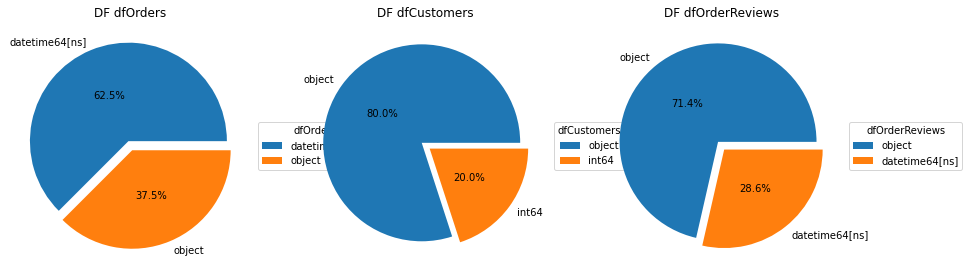

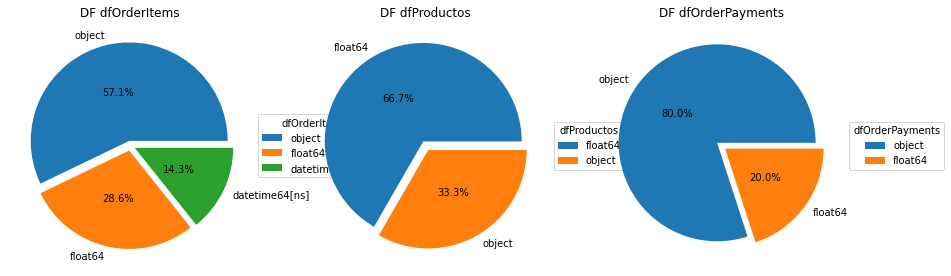

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
dtypes_pie(dfOrders, axs[0])
dtypes_pie(dfCustomers, axs[1])
dtypes_pie(dfOrderReviews, axs[2])
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
dtypes_pie(dfOrderItems, axs[0])
dtypes_pie(dfProductos, axs[1])
dtypes_pie(dfOrderPayments, axs[2])

### Existen columnas sin datos. La conclusión temprana es que son aquellos pedidos que están pendientes de aprobacion y/o entrega

In [25]:
dfProductos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  object 
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.3+ MB


In [26]:
dfOrderSellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
dfOrderPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


In [28]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
dfOrderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  object        
 3   review_comment_title     11713 non-null   object        
 4   review_comment_message   41746 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 5.3+ MB


In [30]:
dfPrdCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          72 non-null     object
 1   product_category_name_english  72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
#Desactivo warnings para facilitar lectura
import warnings
warnings.filterwarnings("ignore")

In [32]:
#Primeras estadisticas
dfOrders.describe().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,9130f021ebec02fff9a8bf9e04e8101a,f1750f5373f1b070b0bbc8c695aae130,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [33]:
dfOrderItems.describe().round()

,price,freight_value
count,112650.0,112650.0
mean,12065.0,1999.0
std,18363.0,1581.0
min,85.0,0.0
25%,3990.0,1308.0
50%,7499.0,1626.0
75%,13490.0,2115.0
max,673500.0,40968.0


In [34]:
dfPrdCat.describe().round()

,product_category_name,product_category_name_english
count,72,72
unique,72,71
top,cine_foto,perfumery
freq,1,2


In [35]:
dfOrderSellers.describe().round()

,seller_zip_code_prefix
count,3095.0
mean,32291.0
std,32713.0
min,1001.0
25%,7094.0
50%,14940.0
75%,64552.0
max,99730.0


In [36]:
dfOrderPayments.describe().round()

,payment_value
count,103886.0
mean,15410.0
std,21749.0
min,0.0
25%,5679.0
50%,10000.0
75%,17184.0
max,1366408.0


In [37]:
dfCustomers.describe().round()

,customer_zip_code_prefix
count,99441.0
mean,35137.0
std,29798.0
min,1003.0
25%,11347.0
50%,24416.0
75%,58900.0
max,99990.0


In [38]:
dfOrderReviews.describe().round()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000,11713,41746,100000,100000
unique,99173,99441,5,4583,36324,637,99010
top,38821b5c496b678cf91acc34892805ad,03c939fd7fd3b38f8485a0f95798f1f6,5,Recomendo,muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,57420,426,369,466,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [39]:
dfPrdCat.describe().round()

,product_category_name,product_category_name_english
count,72,72
unique,72,71
top,cine_foto,perfumery
freq,1,2


Una vez analizados los datasets individuales, es necesario combinarlos para realizar un análisis mas detallado

In [40]:
#Merge de Ordenes con sus lineas de pedidos
dfOrdenesCompletas=pd.merge(dfOrders, dfOrderItems, left_on='order_id', right_on='order_id')
#Merge de Ordenes con sus clientes
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfCustomers, on='customer_id')
#Merge de Ordenes con productos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfProductos, on='product_id')
#Merge de Ordenes con pagos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderPayments, on='order_id')
#Merge de Ordenes con Vendedores
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderSellers, on='seller_id')
#Merge de Ordenes con categoría de productos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfPrdCat, on='product_category_name')
#Merge de Ordenes con review de clientes
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderReviews, on='order_id')





In [41]:
dfOrdenesCompletas.head(25)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,None,"perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,b11cba360bbe71410c291b764753d37f,5,None,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5,None,None,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,426f43a82185969503fb3c86241a9535,5,None,None,2017-08-25,2017-08-28 00:51:18
5,a0f9acf0b6294ed8561e32cde1a966bc,4851b3bca4a48b395dfad7aa57c3f72a,delivered,2017-07-27 15:11:51,2017-07-28 15:23:46,2017-08-02 18:32:34,2017-08-31 20:19:52,2017-08-24,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,c752337ac465a5e2fbdbedf7d79c6659,5,None,None,2017-08-27,2017-08-27 12:30:09
6,bbf796534aaf9c59f8da8c7982db56e0,c32c207d9ebf75958011557ac1624e2f,delivered,2018-03-18 21:00:44,2018-03-20 03:28:44,2018-03-20 18:08:45,2018-03-28 21:57:44,2018-04-12,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,b41646a4365a1411101396c097413907,5,None,"muito bom chegou bem antes do prazo, produto d...",2018-03-29,2018-03-30 12:41:53
7,c9ef97d2854afe64a3b4488bc2836af6,0a29abf475fb8039d2775913d6f0b6f0,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06,2,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,dbacd3ac90ace7ad49fe8b31bbad2808,5,None,None,2017-08-15,2017-08-24 19:35:04
8,c9ef97d2854afe64a3b4488bc2836af6,0a29abf475fb8039d2775913d6f0b6f0,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06,1,436c8d57ff8d4aa254318e9bd9b48c83,...,27277,volta redonda,SP,cool_stuff,dbacd3ac90ace7ad49fe8b31bbad2808,5,None,None,2017-08-15,2017-08-24 19:35:04
9,df2d910b8b5e5f461f67043489f9569d,2e76c1f2a920153d79cc98b634c50942,delivered,2017-06-05 12:22:19,2017-06-05 14:31:21,2017-06-07 13:09:07,2017-06-26 13:52:03,2017-07-06,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,4e58c72bb0373240b2bd9bf84b493a69,1,None,o carrinho veio com defeito.,2017-06-27,2017-06-30 14:26:54


In [42]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  object        
 1   customer_id                    116581 non-null  object        
 2   order_status                   116581 non-null  object        
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116567 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115368 non-null  datetime64[ns]
 6   order_delivered_customer_date  114066 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   order_item_id                  116581 non-null  object        
 9   product_id                     116581 non-null  object        
 10  seller_id                      116581 non-null  object        
 11  

In [43]:
dfOrdenesCompletas.describe().round()

,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,seller_zip_code_prefix
count,116581.0,116581.0,116581.0,116581.0,116581.0,116580.0,116580.0,116580.0,116580.0,116581.0,116581.0
mean,12075.0,2006.0,35053.0,49.0,786.0,2116.0,30.0,17.0,23.0,17291.0,24505.0
std,18385.0,1585.0,29818.0,10.0,653.0,3784.0,16.0,13.0,12.0,26762.0,27625.0
min,85.0,0.0,1003.0,5.0,4.0,0.0,7.0,2.0,6.0,0.0,1001.0
25%,3990.0,1308.0,11310.0,42.0,346.0,300.0,18.0,8.0,15.0,6100.0,6429.0
50%,7490.0,1632.0,24315.0,52.0,600.0,700.0,25.0,13.0,20.0,10819.0,13690.0
75%,13490.0,2122.0,58600.0,57.0,983.0,1800.0,38.0,20.0,30.0,18972.0,28495.0
max,673500.0,40968.0,99980.0,76.0,3992.0,40425.0,105.0,105.0,118.0,1366408.0,99730.0


## Análisis de datos nulos, faltantes

In [44]:
#Declaro array para recorrer el data set para obtener los indices NAN
#Listo los resultados
Campos_Nulos= [feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print(feature, np.round(dfOrdenesCompletas[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrdenesCompletas[feature].isnull().sum(),4))

order_approved_at 0.012 %  y el total de nulos es  14
order_delivered_carrier_date 1.0405 %  y el total de nulos es  1213
order_delivered_customer_date 2.1573 %  y el total de nulos es  2515
product_weight_g 0.0009 %  y el total de nulos es  1
product_length_cm 0.0009 %  y el total de nulos es  1
product_height_cm 0.0009 %  y el total de nulos es  1
product_width_cm 0.0009 %  y el total de nulos es  1
review_comment_title 87.9963 %  y el total de nulos es  102587
review_comment_message 57.222 %  y el total de nulos es  66710


In [45]:
dfOrdenesCompletas.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


## Data wrangling

In [46]:
#Limpieza de fechas nulas.

#Se guardan los indices donde las fechas de aprobacion son nulas 
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_approved_at'].isnull()==True].index.values)

#Completamos la fecha de aprobación nula con la fecha de compra, asumiendo un proceso de aprobación automatica
dfOrdenesCompletas['order_approved_at'].fillna(dfOrdenesCompletas['order_purchase_timestamp'], inplace=True)

#La fecha de entrega al cliente nula, la completamos con la fecha estimada de entrega
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_delivered_customer_date'].isnull()==True].index.values)
dfOrdenesCompletas['order_delivered_customer_date'].fillna(dfOrdenesCompletas['order_estimated_delivery_date'], inplace=True)

#La fecha de entrega carrier nula, la completamos con la fecha estimada de entrega
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_delivered_carrier_date'].isnull()==True].index.values)
dfOrdenesCompletas['order_delivered_carrier_date'].fillna(dfOrdenesCompletas['order_estimated_delivery_date'], inplace=True)


In [47]:
#Chequeo resultados 
Campos_Nulos= [feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print(feature, np.round(dfOrdenesCompletas[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrdenesCompletas[feature].isnull().sum(),4))

product_weight_g 0.0009 %  y el total de nulos es  1
product_length_cm 0.0009 %  y el total de nulos es  1
product_height_cm 0.0009 %  y el total de nulos es  1
product_width_cm 0.0009 %  y el total de nulos es  1
review_comment_title 87.9963 %  y el total de nulos es  102587
review_comment_message 57.222 %  y el total de nulos es  66710


In [48]:
#Relleno el producto NAN con la media
for feature in Campos_Nulos:
    if 'product' in feature:
        dfOrdenesCompletas[feature].fillna(dfOrdenesCompletas[feature].median(), inplace=True)

In [49]:
#Relleno los NAN de Product Reviews con "Sin Titulo" y "Sin Comentarios"
dfOrdenesCompletas['review_comment_message'].fillna('Sin Revision', inplace=True)
dfOrdenesCompletas['review_comment_title'].fillna('Sin Titulo', inplace=True)


In [50]:
dfOrdenesCompletas.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

In [51]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  object        
 1   customer_id                    116581 non-null  object        
 2   order_status                   116581 non-null  object        
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116581 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116581 non-null  datetime64[ns]
 6   order_delivered_customer_date  116581 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   order_item_id                  116581 non-null  object        
 9   product_id                     116581 non-null  object        
 10  seller_id                      116581 non-null  object        
 11  

Para este ejercicio convertiremos los campos de fecha solo para diferenciar el dtype de los campos de textos que se usaran para clasificar, dado que no se utilizarán para la práctica final que no incluye análisis de series de tiempo

In [52]:
Fechas=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date' , 'order_delivered_customer_date','order_estimated_delivery_date','review_creation_date','review_answer_timestamp','shipping_limit_date']
for columns in Fechas:
    dfOrdenesCompletas[columns]=dfOrdenesCompletas[columns].astype('datetime64[ns]')

In [53]:
#Convierto el review score y el precio en en float
dfOrdenesCompletas['review_score']=dfOrdenesCompletas['review_score'].astype('float')
dfOrdenesCompletas['price']=dfOrdenesCompletas['price'].astype('float')


In [54]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  object        
 1   customer_id                    116581 non-null  object        
 2   order_status                   116581 non-null  object        
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116581 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116581 non-null  datetime64[ns]
 6   order_delivered_customer_date  116581 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   order_item_id                  116581 non-null  object        
 9   product_id                     116581 non-null  object        
 10  seller_id                      116581 non-null  object        
 11  

In [55]:
#Seleccion de segmentaciones
features_numericos=[feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].dtype =='float']

In [56]:
features_categoricos=[feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].dtype=='object']

In [57]:
features_numericos

['price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'payment_value',
 'review_score']

In [58]:
features_categoricos

['order_id',
 'customer_id',
 'order_status',
 'order_item_id',
 'product_id',
 'seller_id',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_photos_qty',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'seller_city',
 'seller_state',
 'product_category_name_english',
 'review_id',
 'review_comment_title',
 'review_comment_message']

In [59]:
features_categoricos=np.delete(features_categoricos, (0,1,3,4,5,6,7,14,17,18,19), axis=None)

## Analisis Univariado

In [60]:
# Análisis univariado sobre clientes
dfClientes=dfOrdenesCompletas[['customer_id', 'payment_value', 'order_id', 'customer_city', 'customer_state', 'customer_unique_id', 'payment_type']]

In [61]:
dfClientes.head()

,customer_id,payment_value,order_id,customer_city,customer_state,customer_unique_id,payment_type
0,3ce436f183e68e07877b285a838db11a,7219.0,00010242fe8c5a6d1ba2dd792cb16214,campos dos goytacazes,RJ,871766c5855e863f6eccc05f988b23cb,credit_card
1,e6eecc5a77de221464d1c4eaff0a9b64,7386.0,130898c0987d1801452a8ed92a670612,jatai,GO,0fb8e3eab2d3e79d92bb3fffbb97f188,boleto
2,4ef55bf80f711b372afebcb7c715344a,8323.0,532ed5e14e24ae1f0d735b91524b98b9,belo horizonte,MG,3419052c8c6b45daf79c1e426f9e9bcb,credit_card
3,30407a72ad8b3f4df4d15369126b20c9,7507.0,6f8c31653edb8c83e1a739408b5ff750,sao jose dos pinhais,PR,e7c828d22c0682c1565252deefbe334d,credit_card
4,91a792fef70ecd8cc69d3c7feb3d12da,7219.0,7d19f4ef4d04461989632411b7e588b9,conselheiro lafaiete,MG,0bb98ba72dcc08e95f9d8cc434e9a2cc,credit_card


In [62]:
#Análisis de pagos por estado
dfClientes.groupby(by='customer_state')[['payment_value']].agg(['sum','mean','median']).sort_values(by=('payment_value','sum'),ascending=False)

payment_value                       
                         sum          mean   median
customer_state                                     
SP               755341148.0  15373.397676   9758.0
RJ               274786023.0  18095.885611  11456.0
MG               231063309.0  17077.849889  11276.0
RS               113548531.0  17642.717682  11536.5
PR               105890629.0  17923.261510  10980.5
BA                78876911.0  19748.851027  11796.0
SC                77960848.0  18326.480489  11699.5
GO                50768290.0  21188.768781  11704.5
DF                43273316.0  17540.865829  11435.0
ES                40549265.0  17388.192539  11102.0
PE                37196462.0  19806.422790  13304.0
CE                33880608.0  22029.003901  13476.5
MT                25590818.0  22930.840502  12916.0
PA                25123769.0  22777.669084  14804.0
MA                19695312.0  23502.758950  13812.0
PB                17778166.0  28219.311111  15531.5
MS                16537008.0  19524.212515  12353.0
PI                13602199.0  23989.768959  15262.0
RN                11562114.0  20463.918584  13824.0
AL                11089667.0  24213.246725  13809.0
SE                 8821447.0  22332.777215  14412.0
TO                 7150556.0  21408.850299  13733.0
RO                 6496706.0  23202.521429  15880.5
AM                 3355912.0  19740.658824  12690.0
AC                 2485752.0  26728.516129  18683.0
AP                 2164270.0  25765.119048  16660.0
RR                 1216039.0  24320.780000  16724.0

In [63]:
#Análisis de consumos por estado

dfClientes.sort_values(by='customer_state',ascending=False)
dfAcumuladosClientes = dfClientes.groupby(by='customer_state')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)
dfAcumuladosClientes['Participacion Porcentual'] = dfAcumuladosClientes.apply(lambda x: (x/(x.sum()))*100)
dfAcumuladosClientes['Porcentaje acumulado'] = dfAcumuladosClientes['Participacion Porcentual'].cumsum()/dfAcumuladosClientes['Participacion Porcentual'].sum()*100
dfAcumuladosClientes.sort_values(by='Porcentaje acumulado',ascending=False)
dfAcumuladosClientes

,customer_id,Participacion Porcentual,Porcentaje acumulado
,count,,
customer_state,,,
SP,49133,42.144946,42.144946
RJ,15185,13.025279,55.170225
MG,13530,11.605665,66.775890
RS,6436,5.520625,72.296515
PR,5908,5.067721,77.364236
SC,4254,3.648965,81.013201
BA,3994,3.425944,84.439145
DF,2467,2.116125,86.555271


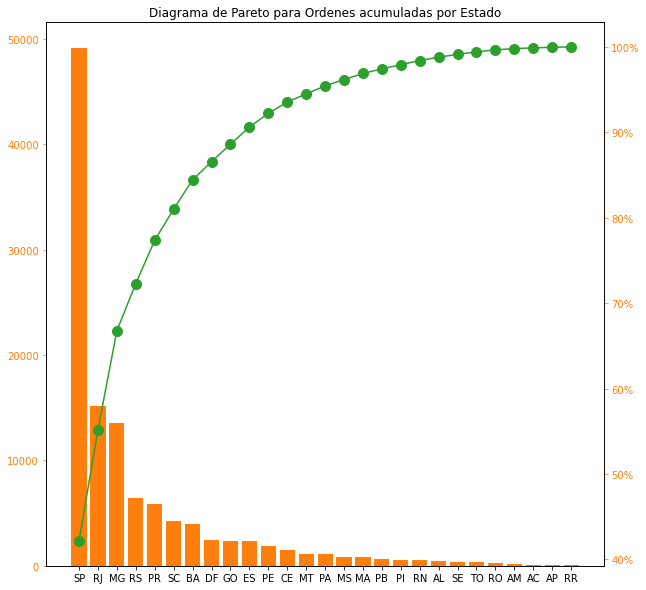

In [64]:
#Diagrama de Pareto
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(dfAcumuladosClientes.index, dfAcumuladosClientes[('customer_id','count')], color="C1")
ax2 = ax.twinx()
ax2.plot(dfAcumuladosClientes.index, dfAcumuladosClientes['Porcentaje acumulado'], color="C2", marker="o", ms=10)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C1")
ax2.tick_params(axis="y", colors="C1")
ax2.set_title('Diagrama de Pareto para Ordenes acumuladas por Estado')
plt.show()

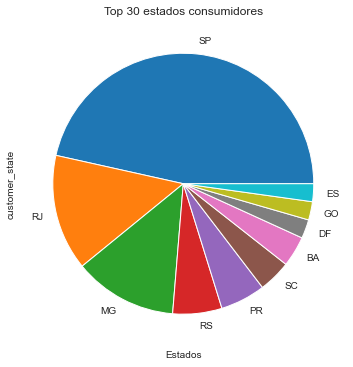

In [65]:
#Participación de los principales estados de consumo
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
ax = dfClientes.customer_state.value_counts().sort_values(ascending=False)[0:10].plot(kind='pie')
ax.set_title("Top 30 estados consumidores")
ax.set_xlabel("Estados")
plt.xticks(rotation=35)
plt.show()

### Conclusion 1

El 67% de las ganancias por ventas provienen de Sao Paulo, Rio de Janeiro y Minas Gerais con mayor concentración en Sao Paulo (Monto por Ventas). Esto permitiría a Olist concentrase en dichos estados por sobre el resto.

Debería hacerse un análisis detallado de los productos consumidos en cada región para entender el patrón de consumo (la mediana de las ordenes indica que no está en esos 3 estados el valor mas alto por orden)

In [66]:
dfPagos = dfClientes.groupby(by='payment_type')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)

dfPagos['Porcentaje de Consumidores'] = dfPagos.apply(lambda x: (x/(x.sum()))*100)

dfPagos['Payments'] = np.round(dfClientes.groupby(by='payment_type')[['payment_value']].agg(['sum']),4)

Monto_Total = dfPagos['Payments'].sum()
dfPagos

,customer_id,Porcentaje de Consumidores,Payments
,count,,
payment_type,,,
credit_card,86012,73.778746,1.548198e+09
boleto,22692,19.464578,4.024296e+08
voucher,6211,5.327626,4.017006e+07
debit_card,1666,1.429049,2.500779e+07


### Conclusion 2

74% de las ventas se abonan con tarjeta de crédito

19% de las ventas se abonan con boleto

El bajo porcentaje de utilización de vouchers señala una posibilidad de marketing y estrategia de fidelizacion de clientes

In [67]:
import pandas_profiling
from pandas_profiling import ProfileReport

report = ProfileReport(dfOrdenesCompletas)

print(repr(report.report))

report.to_widgets()


Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

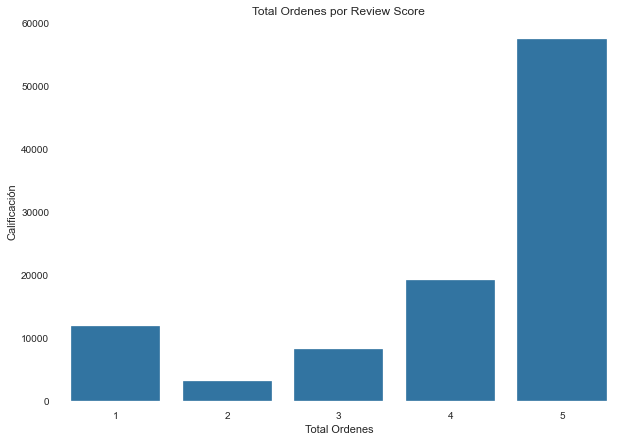

In [68]:
base_color = sns.color_palette()[0]

plt.figure(figsize = (10,7))
sns.barplot(data = dfOrderReviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Total Ordenes por Review Score')
plt.xlabel('Total Ordenes')
plt.ylabel('Calificación');

### Conclusion 3

La mayor cantidad de productos vendidos son los que obtienen el score mas alto

In [69]:
dfOrdenesCompletas.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,Sin Titulo,"perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,b11cba360bbe71410c291b764753d37f,5.0,Sin Titulo,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4.0,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5.0,Sin Titulo,Sin Revision,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,426f43a82185969503fb3c86241a9535,5.0,Sin Titulo,Sin Revision,2017-08-25,2017-08-28 00:51:18


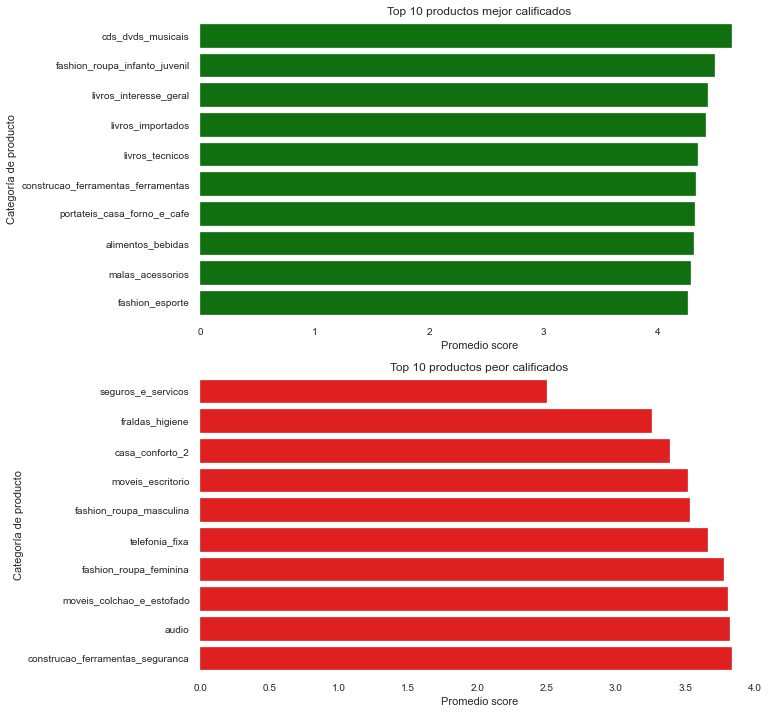

In [70]:
prd_rev_means = dfOrdenesCompletas.groupby('product_category_name').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (10,12))

sns.barplot(data = dfOrdenesCompletas.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Total Ordenes por score')
plt.xlabel('Total Ordenes')
plt.ylabel('Review Score');

plt.subplot(211)
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name', color = 'green')
plt.title('Top 10 productos mejor calificados')
plt.xlabel('Promedio score')
plt.ylabel('Categoría de producto');


plt.subplot(212)
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name', color = 'red')
plt.title('Top 10 productos peor calificados')
plt.xlabel('Promedio score')
plt.ylabel('Categoría de producto');

### Analisis de outliers - Distplots

In [71]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  object        
 1   customer_id                    116581 non-null  object        
 2   order_status                   116581 non-null  object        
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116581 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116581 non-null  datetime64[ns]
 6   order_delivered_customer_date  116581 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   order_item_id                  116581 non-null  object        
 9   product_id                     116581 non-null  object        
 10  seller_id                      116581 non-null  object        
 11  

In [72]:
cate_num=dfOrdenesCompletas.select_dtypes(include=[np.number])
cate_cat=dfOrdenesCompletas.select_dtypes(include=[np.object])

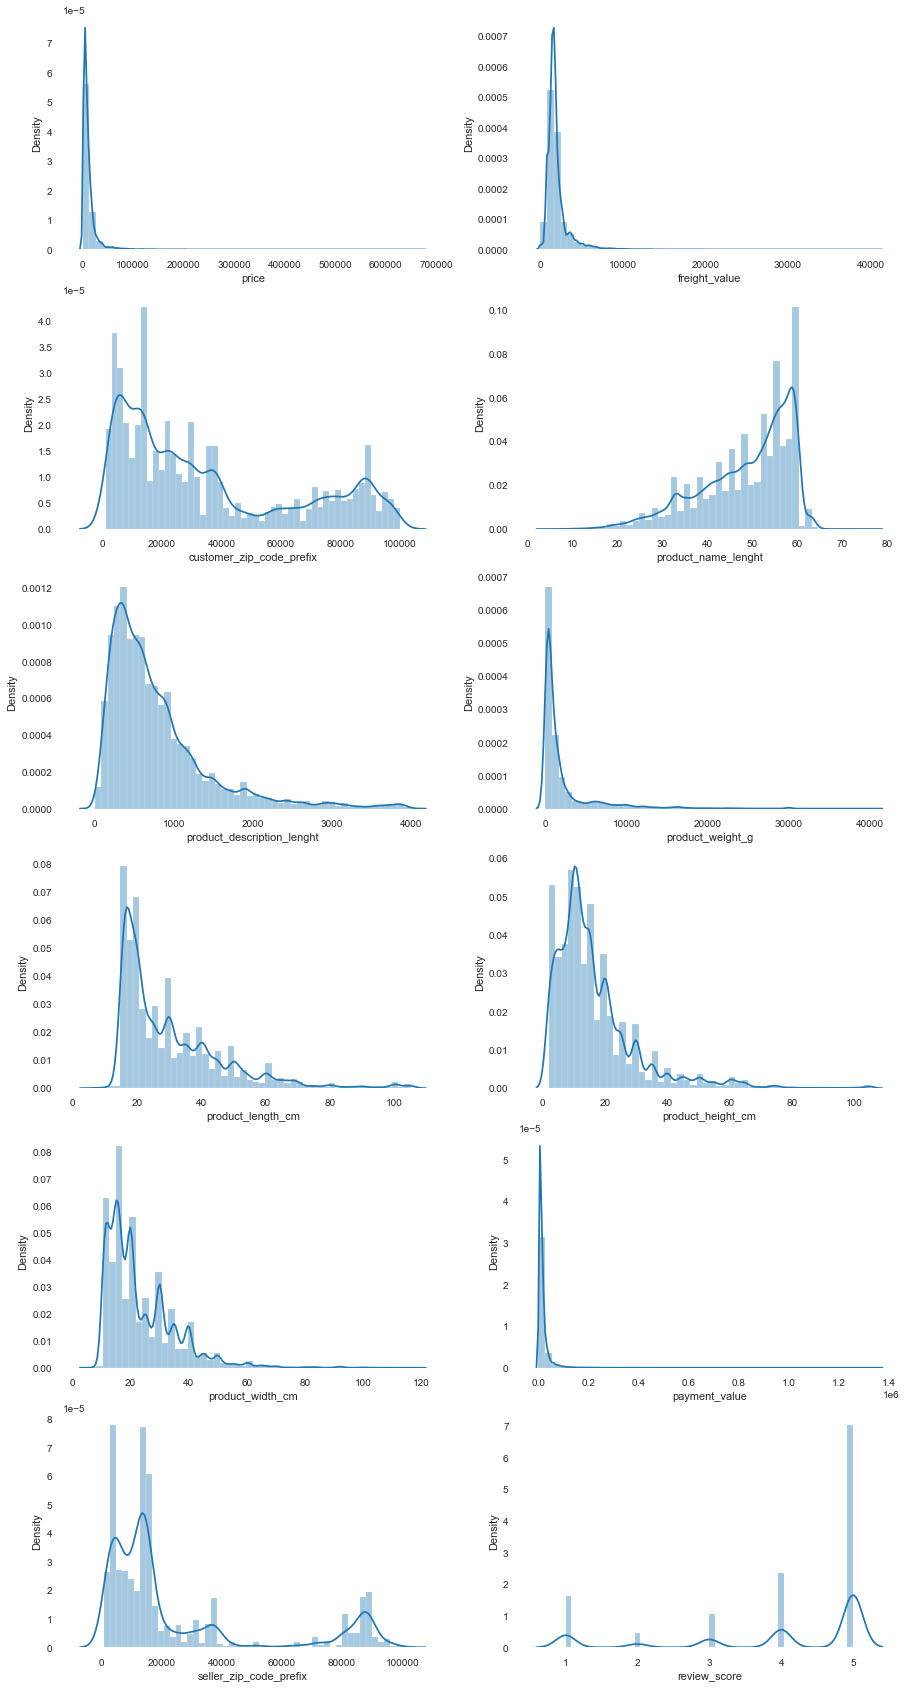

In [73]:
j=0
plt.figure(figsize=(15,30))
for i in cate_num:
    j=j+1
    plt.subplot(6,2,j)
    sns.distplot(cate_num[i])
plt.show()

In [74]:
dfOutliers=dfOrdenesCompletas

cate_num=dfOutliers.select_dtypes(include=[np.number])
cate_cat=dfOutliers.select_dtypes(include=[np.object])

In [75]:
cate_num.isnull().sum()

price                         0
freight_value                 0
customer_zip_code_prefix      0
product_name_lenght           0
product_description_lenght    0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
payment_value                 0
seller_zip_code_prefix        0
review_score                  0
dtype: int64

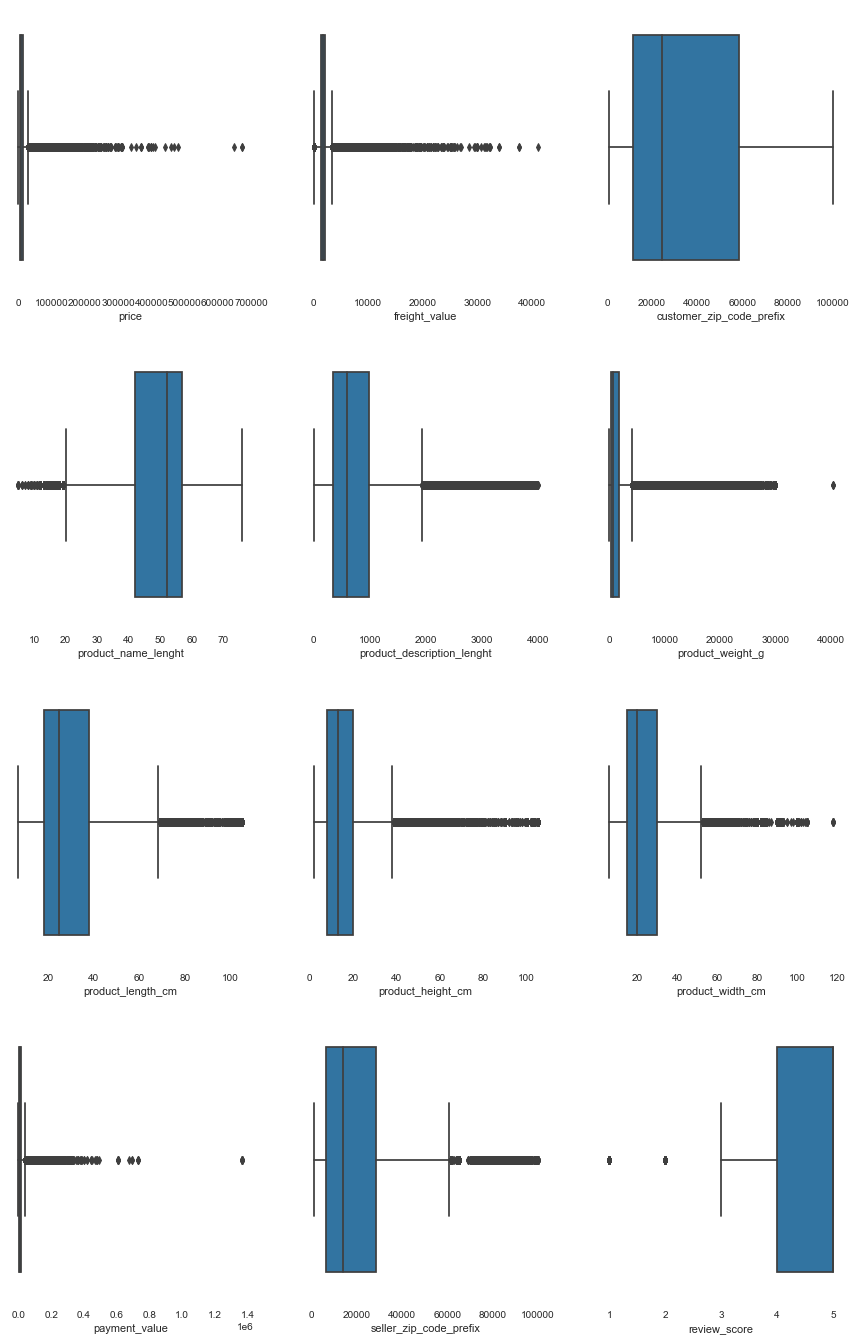

In [76]:
j=0
plt.figure(figsize=(15,30))
for i in cate_num:
    j=j+1
    plt.subplot(5,3,j)
    sns.boxplot(cate_num[i])
plt.show()

In [77]:
dfOutliers.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,Sin Titulo,"perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,b11cba360bbe71410c291b764753d37f,5.0,Sin Titulo,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07


In [78]:
dfOutliers=dfOutliers.drop(['order_purchase_timestamp', 'order_approved_at','shipping_limit_date','order_delivered_carrier_date',
          'order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date','review_answer_timestamp'
          ],axis=1)

In [79]:
#Remuevo outliers por quartil
q1=dfOutliers.quantile(0.25)
q3=dfOutliers.quantile(0.75)
iqr=q3-q1

In [80]:
dfOutliers=dfOutliers[~((dfOutliers<(q1-1.5*iqr))|(dfOutliers>(q3+1.5*iqr))).any(axis=1)]

In [81]:
dfOutliers.shape

(57240, 32)

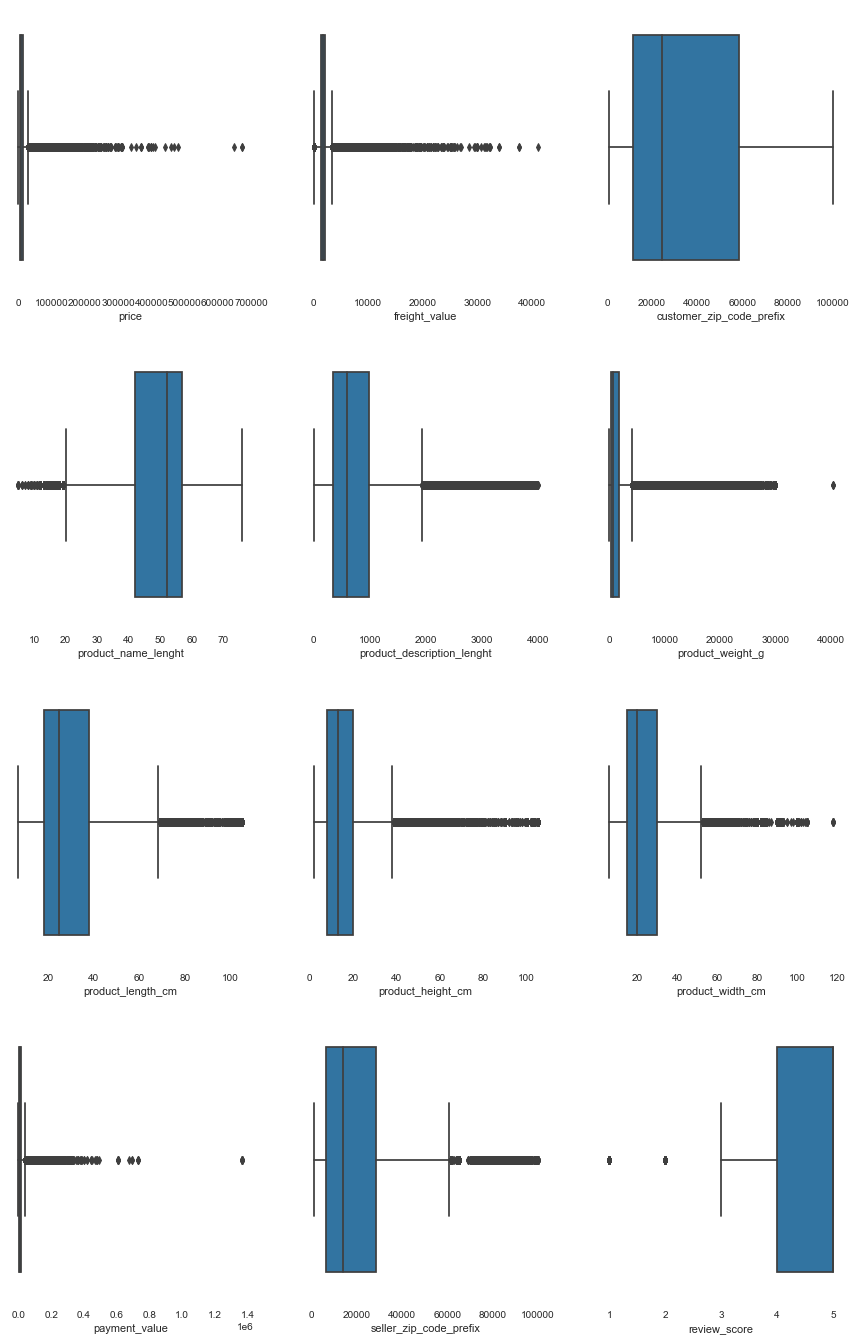

In [82]:
j=0
plt.figure(figsize=(15,30))
for i in cate_num:
    j=j+1
    plt.subplot(5,3,j)
    sns.boxplot(cate_num[i])
plt.show()

In [83]:
#Remuevo los sesgos
cate_num.skew()

price                          7.860937
freight_value                  5.550873
customer_zip_code_prefix       0.784628
product_name_lenght           -0.904765
product_description_lenght     2.012262
product_weight_g               3.581271
product_length_cm              1.743037
product_height_cm              2.242187
product_width_cm               1.709077
payment_value                 14.143067
seller_zip_code_prefix         1.549422
review_score                  -1.247828
dtype: float64

In [84]:
cate_num.head(25)

,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,seller_zip_code_prefix,review_score
0,5890.0,1329.0,28013,58.0,598.0,650.0,28.0,9.0,14.0,7219.0,27277,5.0
1,5590.0,1796.0,75800,58.0,598.0,650.0,28.0,9.0,14.0,7386.0,27277,5.0
2,6490.0,1833.0,30720,58.0,598.0,650.0,28.0,9.0,14.0,8323.0,27277,4.0
3,5890.0,1617.0,83070,58.0,598.0,650.0,28.0,9.0,14.0,7507.0,27277,5.0
4,5890.0,1329.0,36400,58.0,598.0,650.0,28.0,9.0,14.0,7219.0,27277,5.0
5,5590.0,2693.0,44560,58.0,598.0,650.0,28.0,9.0,14.0,8283.0,27277,5.0
6,6490.0,3850.0,45160,58.0,598.0,650.0,28.0,9.0,14.0,10340.0,27277,5.0
7,5890.0,1812.0,75903,58.0,598.0,650.0,28.0,9.0,14.0,15375.0,27277,5.0
8,5890.0,1783.0,75903,54.0,599.0,530.0,30.0,9.0,14.0,15375.0,27277,5.0
9,5590.0,3571.0,53403,58.0,598.0,650.0,28.0,9.0,14.0,5161.0,27277,1.0


## Analisis bivariado


In [85]:
#Análisis de los productos preferidos
dfProdPreferences = dfOrdenesCompletas.groupby(by='product_category_name_english')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)
dfProdPreferences['Porcentaje de participación de Consumidores'] = dfProdPreferences.apply(lambda x: (x/(x.sum()))*100)
dfProdPreferences

,customer_id,Porcentaje de participación de Consumidores
,count,
product_category_name_english,,
bed_bath_table,11990,10.284695
health_beauty,10030,8.603460
sports_leisure,9005,7.724243
furniture_decor,8833,7.576706
computers_accessories,8151,6.991705
...,...,...
arts_and_craftmanship,24,0.020587
la_cuisine,16,0.013724


In [86]:
dfPrincipalProductoConsumido = dfProdPreferences[0:10]
dfPrincipalProductoConsumido.sum()

customer_id                                  count    75318.000000
Porcentaje de participación de Consumidores              64.605725
dtype: float64

### Conclusion 3

Las principales categorías de productos consumidos son: ambientes del hogar, belleza, deportes, decoracion y computación.

Las 10 categorías mas consumidas se llevan el 64% del consumo



## Análisis de medios de pago

In [87]:
dfMediosPago = dfClientes.groupby(by='payment_type')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)

dfMediosPago['Percent customers'] = dfMediosPago.apply(lambda x: (x/(x.sum()))*100)

dfMediosPago['Payments'] = np.round(dfClientes.groupby(by='payment_type')[['payment_value']].agg(['sum']),2)
dfMediosPago['Payments']= dfMediosPago.Payments.astype('int64')
total_payment_value = dfMediosPago['Payments'].sum()

#Calculating percent shares


def percent_payment(x):
  z = x/total_payment_value
  return z * 100

dfMediosPago['Percent payment value'] = dfMediosPago['Payments'].apply(lambda x: percent_payment(x))


dfMediosPago

,customer_id,Percent customers,Payments,Percent payment value
,count,,,
payment_type,,,,
credit_card,86012,73.778746,1548197614,76.802943
boleto,22692,19.464578,402429619,19.963717
voucher,6211,5.327626,40170056,1.992755
debit_card,1666,1.429049,25007786,1.240586


## Análisis de corelaciones

In [88]:
correlation = dfOrdenesCompletas.corr(method="pearson")
correlation.head()

,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,seller_zip_code_prefix,review_score
price,1.000000,0.416591,0.042941,0.017963,0.201692,0.340539,0.145636,0.224322,0.172290,0.738048,0.088985,-0.006065
freight_value,0.416591,1.000000,0.225468,0.022629,0.096484,0.612936,0.308372,0.394073,0.324111,0.373490,0.151844,-0.038556
customer_zip_code_prefix,0.042941,0.225468,1.000000,0.015831,0.025364,0.002730,0.005163,0.012011,-0.010367,0.054158,0.076241,-0.023482
product_name_lenght,0.017963,0.022629,0.015831,1.000000,0.090245,0.020718,0.058687,-0.030914,0.062135,0.002341,-0.032565,-0.005773
product_description_lenght,0.201692,0.096484,0.025364,0.090245,1.000000,0.063553,0.007471,0.074157,-0.068264,0.156024,0.062242,0.009705


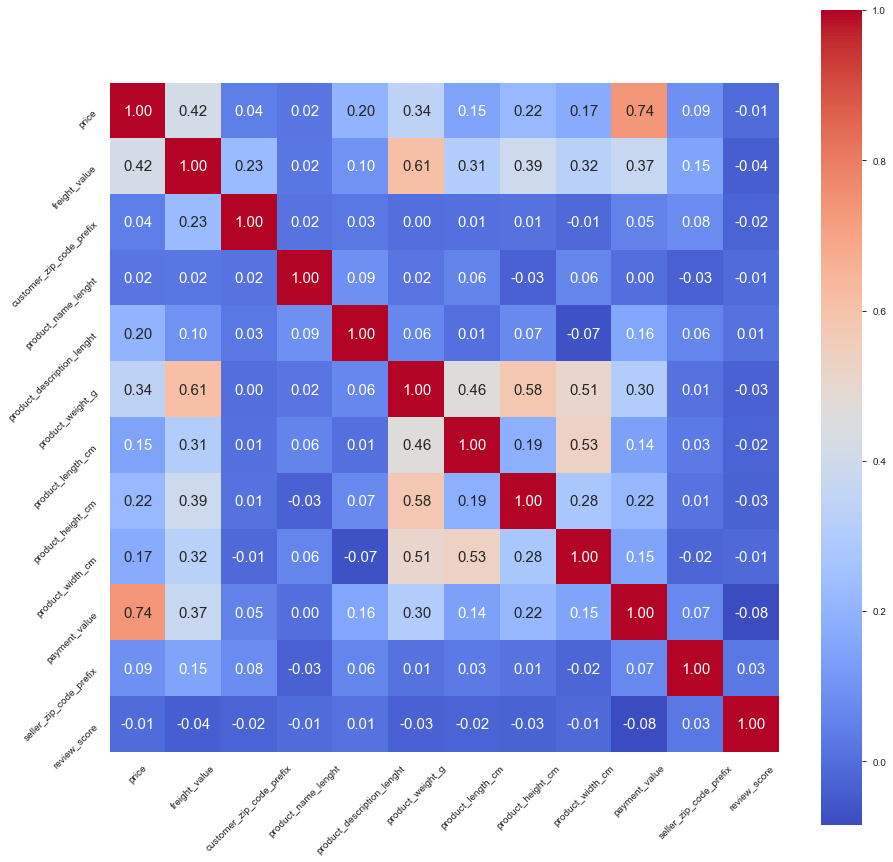

In [89]:
plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### Conclusion 4

Conviene estudiar mas en detalle la relacion entre:

- order_item_id y payment_value (linea de pedido y valor del pago)

- product_weight y freight_value (peso del producto y valor del flete)

- price y payment_installments (precio y cuotas)


# TP 2 - Modelos y medidas -  Árbol de decisión

In [90]:
#Importo librerías

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [91]:
#Hago un head del df

dfOrdenesCompletas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,Sin Titulo,"perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,b11cba360bbe71410c291b764753d37f,5.0,Sin Titulo,"lannister como sempre, entregou certinho e den...",2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4.0,super recomendo,carrinho muito bonito,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5.0,Sin Titulo,Sin Revision,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,1,4244733e06e7ecb4970a6e2683c13e61,...,27277,volta redonda,SP,cool_stuff,426f43a82185969503fb3c86241a9535,5.0,Sin Titulo,Sin Revision,2017-08-25,2017-08-28 00:51:18


In [92]:
features_categoricos

array(['order_status', 'customer_state', 'product_category_name',
       'product_photos_qty', 'payment_sequential', 'payment_type',
       'payment_installments', 'seller_state',
       'product_category_name_english'], dtype='<U29')

In [93]:
#Vamos a intentar predecir el valor de la review partiendo de las variables "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"
#Vamos a intentar predecir el valor de la review partiendo de las variables "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"
columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
X = dfOrdenesCompletas[columns]
y = dfOrdenesCompletas.review_score #Defino el target

In [94]:
#Divido el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)

In [95]:
#Creo el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 77)

In [96]:
#Entreno el modelo

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=77)

In [97]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [98]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.5605592726025047
% de aciertos sobre el set de evaluación: 0.5648606147248034


In [99]:
#Creo el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 77)

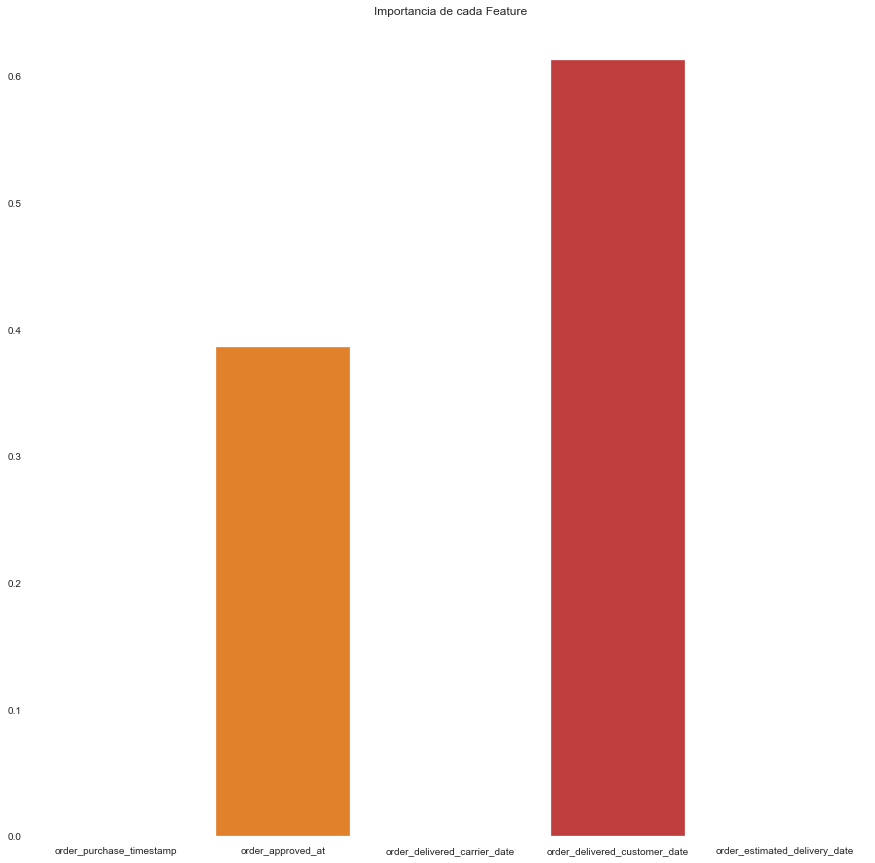

In [100]:
#Entreno el modelo

tree.fit(X_train,y_train)#Analizo cuáles variables son las más importantes dentro del modelo

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

### Conclusión 5

Pese a la casi nula correlación que existía en las variables, luego de entrenar el modelo logramos que el mismo reproduzca con un 55% de acierto la calificación de la review del cliente. Es probable que este resultado se haya logrado gracias a la gran cantidad de observaciones con las que cuenta el dataset.
También es importante destacar que parece que 3 variables serían inútiles en el modelo, bastaría con utilizar 'order_purchase_timestamp' y 'order_delivered_customer_date' para alcanzar resultados similares.
Debido a la poca diferencia que se aprecia entre los porcentajes de aciertos entre el conjunto de 'train' y el de 'test' podríamos afirmar que nuestro modelo no sufre de overfitting.

## NLP sobre comentarios y scores de ordenes

In [101]:
import nltk
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import RandomOverSampler

In [102]:
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')
nltk.download('punkt')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
dfOrderS=pd.read_sql("SELECT * from olist_order_reviews", conn)

In [104]:
n_of_records = dfOrderS['review_comment_message'].isnull().sum()
print(f'Nro def filas sin comentarios : {n_of_records}')
print(f'Nro def filas con comentarios {len(dfOrderS)-n_of_records}')

Nro def filas sin comentarios : 58254
Nro def filas con comentarios 41746


In [105]:
dfOrderS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  object        
 3   review_comment_title     11713 non-null   object        
 4   review_comment_message   41746 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 5.3+ MB


In [106]:
# Transformo review_score en un float
dfOrderS['review_score']=dfOrderReviews['review_score'].astype('float64')

In [107]:
# Transformo review_score en un float
dfOrderS.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Distribución de reviews
Buscamos responder:

¿Los datos son muy escasos?

¿Están concentrados los datos?

Podemos ver que los datos se concentran en torno a la revisión de 5 estrellas y la revisión de 1 estrella.

Vamos a equilibrar estos datos

<AxesSubplot:>

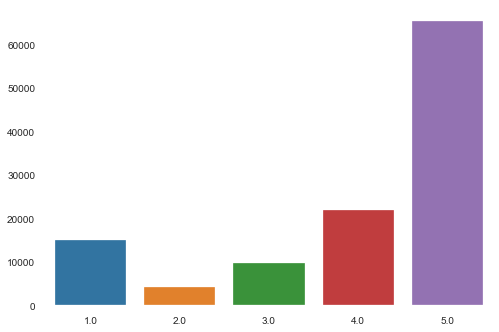

In [108]:
sns.barplot(x = np.unique(y), y = [list(y).count(i) for i in np.unique(y)])

In [109]:
for i in np.unique(y):
    print(f'El porcentaje de Score {i} en los datos es {list(y).count(i)/len(dfOrderReviews)} %')

El porcentaje de Score 1.0 en los datos es 0.1511 %
El porcentaje de Score 2.0 en los datos es 0.04133 %
El porcentaje de Score 3.0 en los datos es 0.09842 %
El porcentaje de Score 4.0 en los datos es 0.22017 %
El porcentaje de Score 5.0 en los datos es 0.65479 %


## Pre Procesamiento de datos de texto
Tomamos el texto y eliminamos cualquier tipo de caracteres especiales.

Eliminamos palabras vacías en portugués del texto

In [110]:
dfOrderS.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0001239bc1de2e33cb583967c2ca4c67,fc046d7776171871436844218f817d7d,5.0,None,None,2018-03-20,2018-03-20 18:36:04
1,0001cc6860aeaf5b9017fe4131a52e62,d4665434b01caa9dc3e3e78b3eb3593e,5.0,None,None,2018-06-22,2018-06-26 13:51:29
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,5.0,Entrega rápida!,a entrega foi super rápida e o pendente é lind...,2018-04-25,2018-04-26 14:55:36
3,00032b0141443497c898b3093690af51,04fb47576993a3cb0c12d4b25eab6e4e,5.0,None,None,2017-05-30,2017-06-01 23:28:55
4,00034d88989f9a4c393bdcaec301537f,5f358d797a49fe2f24352f73426215f6,5.0,None,None,2017-08-12,2017-08-13 19:56:53


In [111]:
dfOrderS.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [112]:
# Limpieza de datos
# Remoción de comentarios vacíos
# Análisis depérdida de datos
nFilas = dfOrderS['review_comment_message'].isnull().sum()
print(f'Número de filas sin comentarios : {nFilas}')
print(f'Número de filas con comentarios: {len(dfOrderS)-nFilas}')

Campos_Nulos= [feature for feature in dfOrderS.columns if dfOrderS[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print('Feature ', feature, np.round(dfOrderS[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrderS[feature].isnull().sum(),4))
    

Número de filas sin comentarios : 58254
Número de filas con comentarios: 41746
Feature  review_comment_title 88.287 %  y el total de nulos es  88287
Feature  review_comment_message 58.254 %  y el total de nulos es  58254


In [113]:
dfOrderS=dfOrderS.dropna()

In [114]:
nFilas = dfOrderS['review_comment_message'].isnull().sum()
print(f'Número de filas sin comentarios : {nFilas}')
print(f'Número de filas con comentarios: {len(dfOrderS)-nFilas}')

Campos_Nulos= [feature for feature in dfOrderS.columns if dfOrderS[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print('Feature ', feature, np.round(dfOrderS[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrderS[feature].isnull().sum(),4))
    

Número de filas sin comentarios : 0
Número de filas con comentarios: 9984


In [115]:
y = dfOrderS.pop('review_score') 

In [116]:
dfOrderS

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,Entrega rápida!,a entrega foi super rápida e o pendente é lind...,2018-04-25,2018-04-26 14:55:36
7,00046a69550325aea5fb89f65c7387f2,9fbda7367628952bc36c3512c46d887b,SUPER RECOMENDO,"gostei da capinha de celular, veio como eu esp...",2018-07-01,2018-07-02 12:32:24
13,000688fa7009b3c9fafe4950b37cbc81,f7445b0cae0fd4d05894171adcc55931,Bom,meu sait preferido,2018-06-19,2018-06-20 04:48:13
28,00112b1cb3cd58339c91aad88df2b835,c7068b2d09a51ca53dd0a06c2526be34,Entrega muito rápida,nota 10 pela entrega.\r\no produto não tem a c...,2018-05-03,2018-05-03 22:14:11
35,00148610066c357531807daea5888a22,8f705decc6b7168523d676183f61b950,ENTREGA DENTRO DO PRAZO,entrega dentro do prazo..recomendo!,2018-05-16,2018-05-25 17:57:16
...,...,...,...,...,...,...
99942,ffd23fd8bdd92b248c78db6dd5809104,6d4e74b6495388cdfde5999070ad25d7,Recomendo,ainda experimentando o produto,2018-08-02,2018-08-03 12:43:45
99947,ffda963529fcb525067c642cf666b175,5fb90fed46dfc44305e1c3ecb5f16a2d,Super recomendo.,excelente atendimento.,2018-05-05,2018-05-08 16:04:54
99955,ffdedfdb2405f13967c76175160acd3e,b378d3979dc4d1d8bd701f93e8b7ce6a,Recomendo,o produto chegou certo e bem antes do prazo.,2018-06-30,2018-07-04 00:35:42
99966,ffe556cda2b136b51ede6d5ce5559a53,b23fef1fa296cd791a57b465a3dc3827,Super recomendo,produto chegou antes do prazo e com ótima qual...,2018-06-15,2018-06-15 19:18:50


In [117]:
texts = dfOrderS['review_comment_message']

In [118]:
texts

2        a entrega foi super rápida e o pendente é lind...
7        gostei da capinha de celular, veio como eu esp...
13                                     meu sait preferido 
28       nota 10 pela entrega.\r\no produto não tem a c...
35                     entrega dentro do prazo..recomendo!
                               ...                        
99942                       ainda experimentando o produto
99947                               excelente atendimento.
99955         o produto chegou certo e bem antes do prazo.
99966    produto chegou antes do prazo e com ótima qual...
99974                          muito boa a loja. parabéns.
Name: review_comment_message, Length: 9984, dtype: object

In [119]:
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


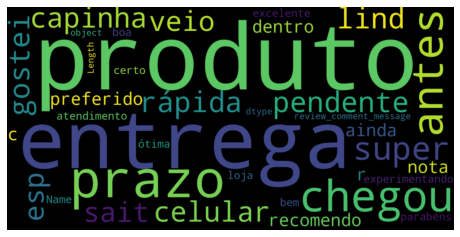

<Figure size 576x396 with 0 Axes>

In [120]:
stop_words=nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1600, height=800).generate(str(texts))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("WordCloud.png")

In [121]:
def pre_process_data(text):
    lemm = WordNetLemmatizer()
    text  = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    tokenized = word_tokenize(text)
    text = [lemm.lemmatize(i.lower()) for i in tokenized if not(i.lower() in stop_words) and i.isalpha()]
    return ' '.join(text)

In [122]:
n_samples = 10000
n_features = 100000
n_components = 10
n_top_words = 20

In [123]:
dfOrderS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 2 to 99974
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9984 non-null   object        
 1   order_id                 9984 non-null   object        
 2   review_comment_title     9984 non-null   object        
 3   review_comment_message   9984 non-null   object        
 4   review_creation_date     9984 non-null   datetime64[ns]
 5   review_answer_timestamp  9984 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 546.0+ KB


In [124]:
texts

2        a entrega foi super rápida e o pendente é lind...
7        gostei da capinha de celular, veio como eu esp...
13                                     meu sait preferido 
28       nota 10 pela entrega.\r\no produto não tem a c...
35                     entrega dentro do prazo..recomendo!
                               ...                        
99942                       ainda experimentando o produto
99947                               excelente atendimento.
99955         o produto chegou certo e bem antes do prazo.
99966    produto chegou antes do prazo e com ótima qual...
99974                          muito boa a loja. parabéns.
Name: review_comment_message, Length: 9984, dtype: object

In [125]:
vectorizer = CountVectorizer(max_features=10000)
vectorizer2 = TfidfTransformer()
x = vectorizer.fit_transform(texts)
x = vectorizer2.fit_transform(x,y)


In [126]:
texts = [pre_process_data(i) for i in texts]

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
rf_model = RandomForestClassifier(n_jobs=5,verbose=1)

In [128]:
scores_nos = cross_val_score(rf_model,x,y)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 100

In [129]:
print(f'Promedio de scoring para set de datos sin oversampling {scores_nos.mean()}')

Promedio de scoring para set de datos sin oversampling 0.6796877179496701


In [130]:
rf_model.fit(x_train,y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomForestClassifier(n_jobs=5, verbose=1)

In [131]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.59      0.87      0.70       472
         2.0       0.67      0.03      0.06       122
         3.0       0.38      0.03      0.05       209
         4.0       0.31      0.05      0.08       339
         5.0       0.74      0.94      0.83      1354

    accuracy                           0.69      2496
   macro avg       0.54      0.38      0.35      2496
weighted avg       0.62      0.69      0.60      2496



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


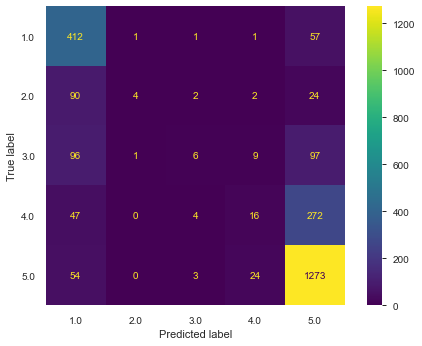

In [132]:


plot_confusion_matrix(rf_model,x_test,y_test)

plt.show()

## Oversampling

En los problemas de clasificación pudimos encontrar que en nuestro conjunto de datos de entrenamiento puede que tengamos algunas features / clases con poco muestreo

In [133]:
ro = RandomOverSampler()
x_ros, y_ros = ro.fit_resample(x, y)
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros)

<AxesSubplot:>

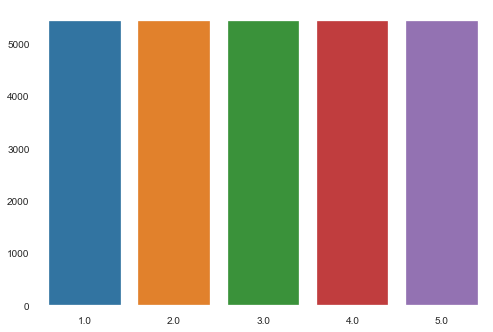

In [134]:
sns.barplot(x = np.unique(y), y = [list(y_ros).count(i) for i in np.unique(y)])

In [135]:
rf_model = RandomForestClassifier(verbose = 1,n_jobs=5)
score = cross_val_score(rf_model,x_ros,y_ros,cv=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   10.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   10.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 100

In [136]:
print(f'La mediana del score fue {0}: {score.mean()}')


La mediana del score fue 0: 0.9262499999999999


In [137]:
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96      1356
         2.0       0.98      0.98      0.98      1332
         3.0       0.97      0.93      0.95      1353
         4.0       0.84      0.87      0.86      1371
         5.0       0.86      0.83      0.84      1388

    accuracy                           0.92      6800
   macro avg       0.92      0.92      0.92      6800
weighted avg       0.92      0.92      0.92      6800



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


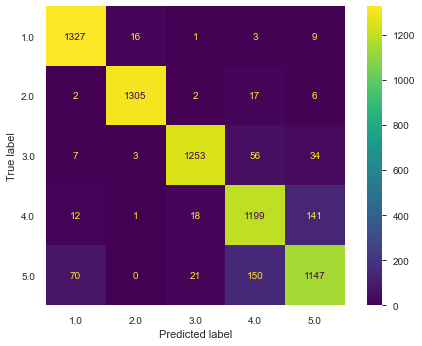

In [139]:
plot_confusion_matrix(rf_model,x_test,y_test)

### Conclusion 6

- Las métricas del oversampling demuestran cercanía al overfiting. Este resultado genera sospechas sobre la calidad del modelo con sobremuestra, principalmente por su alta calificación, con lo cual es necesario evaluar la precisión de las distintas clases.

- A menos que el cliente considere estos resultados normales, se sugiere trabajar sobre el feature de review de compra de la página web para ajustar los resultados (por ejemplo, scoring 5 sin comentarios)

- Cabe la posibilidad de que al sobre muestrear nuestro modelo se genera el overfitting.




## Análisis de features

In [140]:
from scipy import stats
for i in cate_num.drop('price',axis=1).select_dtypes(include=np.number).columns:
    s=stats.pearsonr(cate_num[i],cate_num['price'])
    if(s[1]<0.05):
        print('El feature: ', i,' SI afecta el precio')
    else:
        print('El feature: ', i,' NO afecta el precio') 
        

El feature:  freight_value  SI afecta el precio
El feature:  customer_zip_code_prefix  SI afecta el precio
El feature:  product_name_lenght  SI afecta el precio
El feature:  product_description_lenght  SI afecta el precio
El feature:  product_weight_g  SI afecta el precio
El feature:  product_length_cm  SI afecta el precio
El feature:  product_height_cm  SI afecta el precio
El feature:  product_width_cm  SI afecta el precio
El feature:  payment_value  SI afecta el precio
El feature:  seller_zip_code_prefix  SI afecta el precio
El feature:  review_score  SI afecta el precio


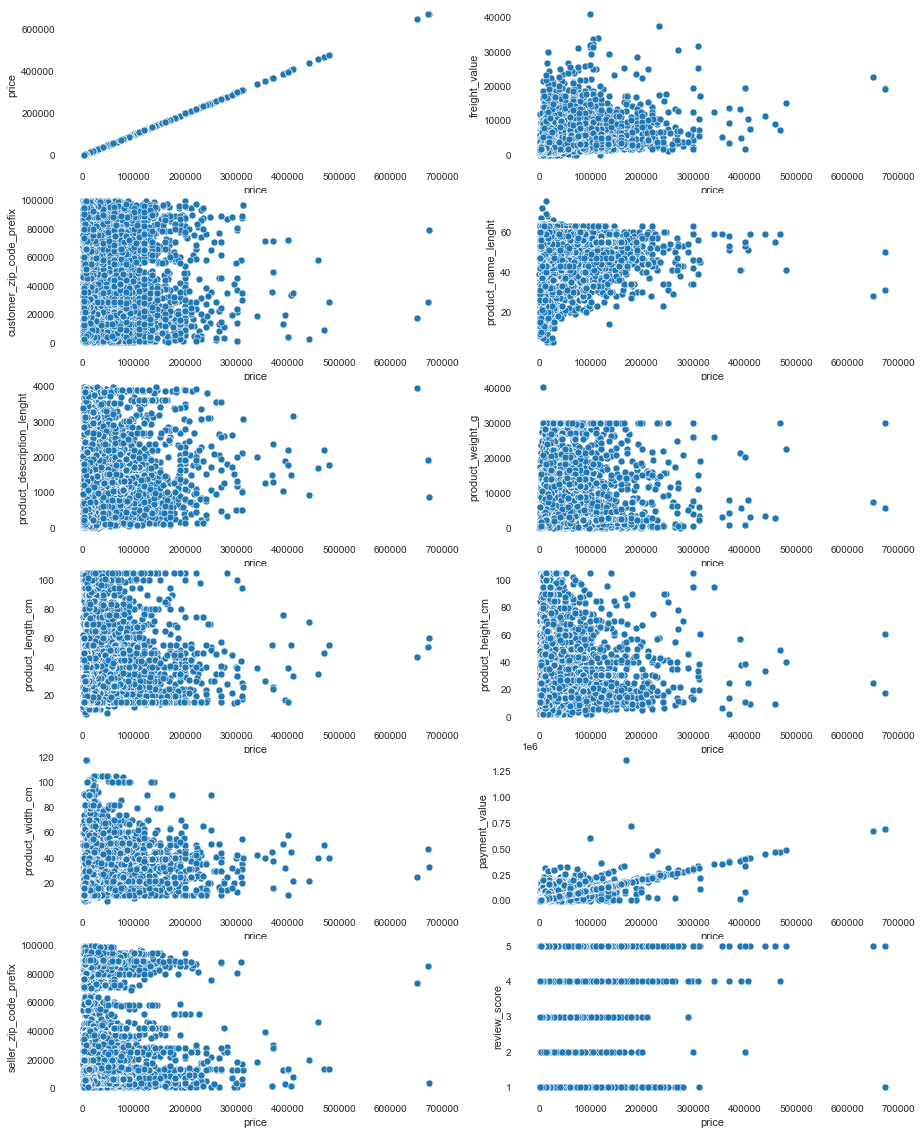

In [141]:
j=0
plt.figure(figsize=(15,20))
for i in cate_num:
    j=j+1
    plt.subplot(6,2,j)
    sns.scatterplot(cate_num['price'],cate_num[i])
plt.show()

In [142]:
cate_cat.head(2)

,order_id,customer_id,order_status,order_item_id,product_id,seller_id,customer_unique_id,customer_city,customer_state,product_category_name,product_photos_qty,payment_sequential,payment_type,payment_installments,seller_city,seller_state,product_category_name_english,review_id,review_comment_title,review_comment_message
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,cool_stuff,4,1,credit_card,2,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,Sin Titulo,"perfeito, produto entregue antes do combinado."
1,130898c0987d1801452a8ed92a670612,e6eecc5a77de221464d1c4eaff0a9b64,delivered,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,cool_stuff,4,1,boleto,1,volta redonda,SP,cool_stuff,b11cba360bbe71410c291b764753d37f,Sin Titulo,"lannister como sempre, entregou certinho e den..."


<AxesSubplot:xlabel='payment_type', ylabel='price'>

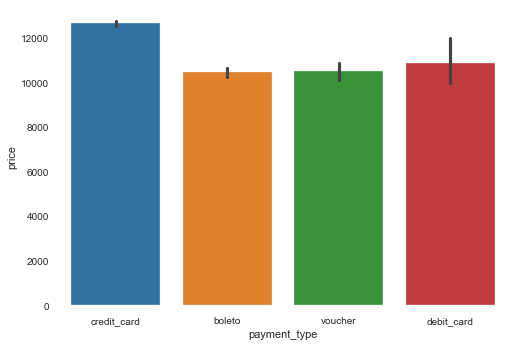

In [143]:
sns.barplot(cate_cat["payment_type"],cate_num["price"])

<AxesSubplot:xlabel='order_status', ylabel='price'>

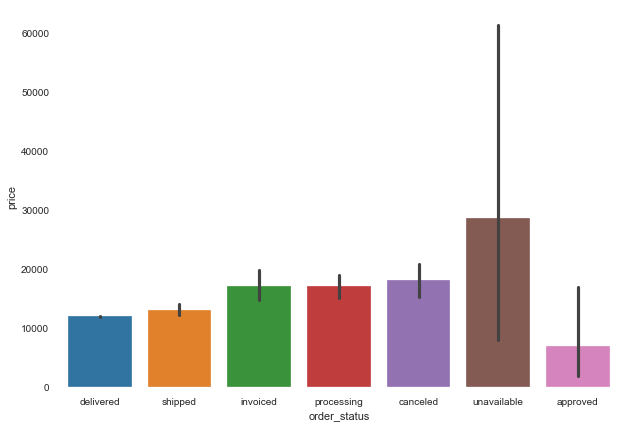

In [144]:
plt.figure(figsize=(10,7))
sns.barplot(cate_cat["order_status"],cate_num["price"])

In [145]:
#Análisis de nombres de categorías 
cate_cat["product_category_name_english"].value_counts()

bed_bath_table               11990
health_beauty                10030
sports_leisure                9005
furniture_decor               8833
computers_accessories         8151
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [146]:
#Removemos la categoría con nombres en inglés ya que no hace sentido
cate_cat=cate_cat.drop("product_category_name_english",axis=1)

In [147]:
cate_cat.describe(include='all')

,order_id,customer_id,order_status,order_item_id,product_id,seller_id,customer_unique_id,customer_city,customer_state,product_category_name,product_photos_qty,payment_sequential,payment_type,payment_installments,seller_city,seller_state,review_id,review_comment_title,review_comment_message
count,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581,116581
unique,97255,97255,7,21,32328,3033,94087,4095,27,71,19,29,4,24,604,23,97053,4533,35323
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,1,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,cama_mesa_banho,1,1,credit_card,1,sao paulo,SP,eef5dbca8d37dfce6db7d7b16dd0525e,Sin Titulo,Sin Revision
freq,63,63,114067,102118,536,2155,75,18412,49133,11990,58951,111597,86012,58030,29056,83121,63,102587,66710


In [148]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'product_name_lenght ~ price'
model = ols(formula,cate_num).fit()
anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
price,3.786914e+03,1.0,37.626795,8.593381e-10
Residual,1.173299e+07,116579.0,NaN,NaN


In [149]:
formula = 'payment_value ~ price'
model = ols(formula,cate_num).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
price,4.548189e+13,1.0,139478.071692,0.0
Residual,3.801482e+13,116579.0,NaN,NaN


In [150]:
formula = 'product_weight_g ~ price'
model = ols(formula,cate_num).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
price,1.935366e+11,1.0,15292.779603,0.0
Residual,1.475356e+12,116579.0,NaN,NaN


In [151]:
formula = 'freight_value ~ price'
model = ols(formula,cate_num).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
price,5.079920e+10,1.0,24480.649049,0.0
Residual,2.419103e+11,116579.0,NaN,NaN


In [152]:
target=cate_num["price"]
cate_num=cate_num.drop("price",axis=1)

In [153]:
stored_mean=cate_num.mean()
stored_std=cate_num.std()
mdf_test=cate_num
cate_num.iloc[:]=cate_num.iloc[:].apply(lambda x: (x-x.mean())/x.std() )

In [154]:
cate_num.head()

,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,seller_zip_code_prefix,review_score
0,-0.427411,-0.236113,0.920264,-0.287995,-0.387345,-0.142919,-0.567424,-0.775334,-0.376352,0.100347,0.702842
1,-0.132691,1.366517,0.920264,-0.287995,-0.387345,-0.142919,-0.567424,-0.775334,-0.370112,0.100347,0.702842
2,-0.109340,-0.145329,0.920264,-0.287995,-0.387345,-0.142919,-0.567424,-0.775334,-0.335100,0.100347,-0.012524
3,-0.245656,1.610330,0.920264,-0.287995,-0.387345,-0.142919,-0.567424,-0.775334,-0.365591,0.100347,0.702842
4,-0.427411,0.045161,0.920264,-0.287995,-0.387345,-0.142919,-0.567424,-0.775334,-0.376352,0.100347,0.702842


## Regresión Lineal Precios


In [155]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [156]:
features_numericos

['price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'payment_value',
 'review_score']

In [157]:
#Vamos a intentar predecir el precio partiendo de las variables "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"
columns = [ "freight_value", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "payment_value"]
X = dfOrdenesCompletas[columns]
y = dfOrdenesCompletas.price #Defino el target

In [158]:
#Divido el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)

In [159]:
X_train,X_test,Y_train,Y_test=train_test_split(dfOrdenesCompletas[columns],target,test_size=0.3,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(81606, 6)
(34975, 6)
(81606,)
(34975,)


# Randon Forest

In [160]:

#Creo el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 77)


In [161]:
#Entreno el modelo

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=77)

In [162]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [163]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.022167487684729065
% de aciertos sobre el set de evaluación: 0.022759113652609006


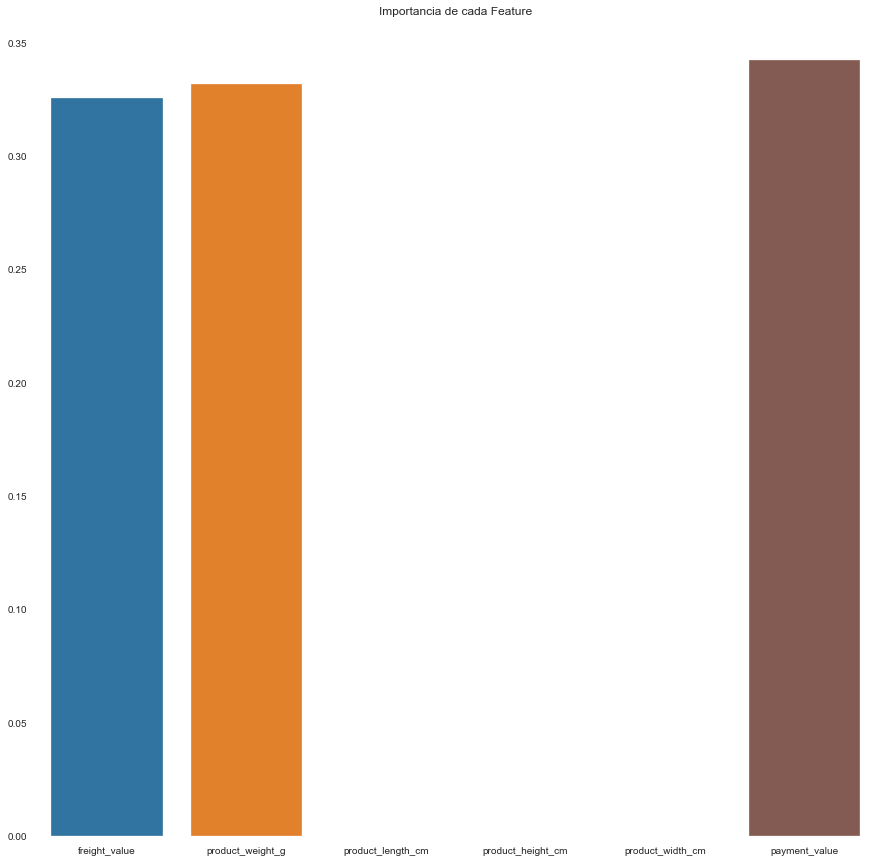

In [164]:

#Analizo cuáles variables son las más importantes dentro del modelo

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## Conclusión 7

La Conclusión 4, a partir la la matriz de correlacion, indicaba que convenía estudiar mas en detalle la relacion entre: 

order_item_id y payment_value (linea de pedido y valor del pago)

product_weight y freight_value (peso del producto y valor del flete)

price y payment_installments (precio y cuotas)

El modelo no arroja una prediccoón confiable

# Prueba con variables relacionadas

In [165]:
from sklearn.tree import export_graphviz
import IPython, graphviz, re
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [166]:
dt1 = DecisionTreeRegressor(max_depth=3).fit(X_train, Y_train)
dt1.score(X_train, Y_train)

0.6051178078791639

In [167]:
from sklearn.ensemble import RandomForestRegressor

rf1= RandomForestRegressor(max_depth=3).fit(X_train, Y_train)
rf1.score(X_train, Y_train)

0.6361025816094535

In [168]:
#Chequeo overfitting
Pred_train_dt=dt1.predict(X_train)
mse_train=round(mean_squared_error(Y_train,Pred_train_dt),4)


Pred_test_dt=dt1.predict(X_test)
mse_test=round(mean_squared_error(Y_test,Pred_test_dt),4)

print("MSE TRAIN  :",mse_train,"\n\nMSE TEST :",mse_test)

MSE TRAIN  : 133883501.1883 

MSE TEST : 130821285.0363


In [169]:
rmse_train=round(np.sqrt(mse_train),4)
rmse_test=round(np.sqrt(mse_test),4)

print("RMSE TRAIN  :",rmse_train,"\n\nRMSE TEST :",rmse_test)

RMSE TRAIN  : 11570.8038 

RMSE TEST : 11437.7133


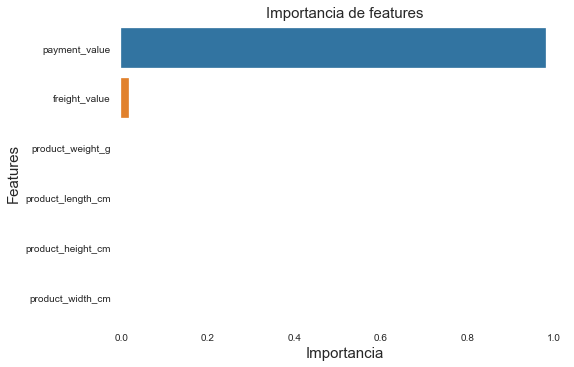

In [170]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt1.feature_importances_})

# Ordeno el dataset por importancia del feature
important_features = important_features.sort_values('Importance', ascending = False)

# Creo grafico de barras
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Importancia de features', fontsize = 15)
plt.xlabel('Importancia', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


plt.show()


In [171]:
print(dt1.decision_path(X_train))

  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 6)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (2, 0)	1
  (2, 8)	1
  (2, 9)	1
  (2, 11)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	1
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 4)	1
  (6, 0)	1
  :	:
  (81599, 3)	1
  (81600, 0)	1
  (81600, 1)	1
  (81600, 2)	1
  (81600, 4)	1
  (81601, 0)	1
  (81601, 1)	1
  (81601, 2)	1
  (81601, 3)	1
  (81602, 0)	1
  (81602, 1)	1
  (81602, 2)	1
  (81602, 4)	1
  (81603, 0)	1
  (81603, 1)	1
  (81603, 5)	1
  (81603, 6)	1
  (81604, 0)	1
  (81604, 1)	1
  (81604, 2)	1
  (81604, 4)	1
  (81605, 0)	1
  (81605, 1)	1
  (81605, 5)	1
  (81605, 6)	1


In [172]:
print("La feature seleccionada ",round(dt1.score(X_train, Y_train),3)*100,"% de variación en los datos usando DECISION TREE REGRESSOR ")

La feature seleccionada  60.5 % de variación en los datos usando DECISION TREE REGRESSOR 
